In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

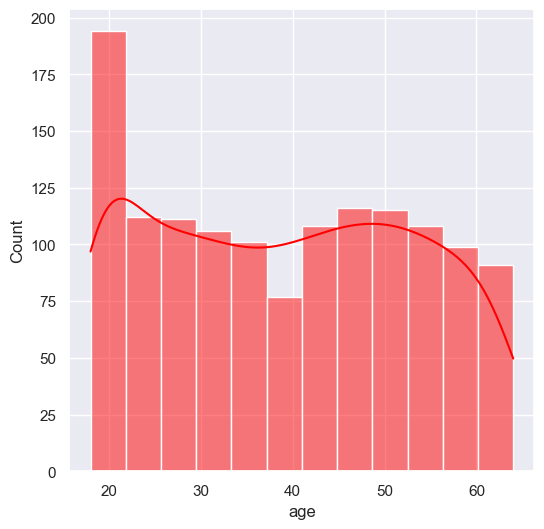

In [10]:
sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(data['age'], kde=True, color='red')

<Axes: xlabel='sex', ylabel='count'>

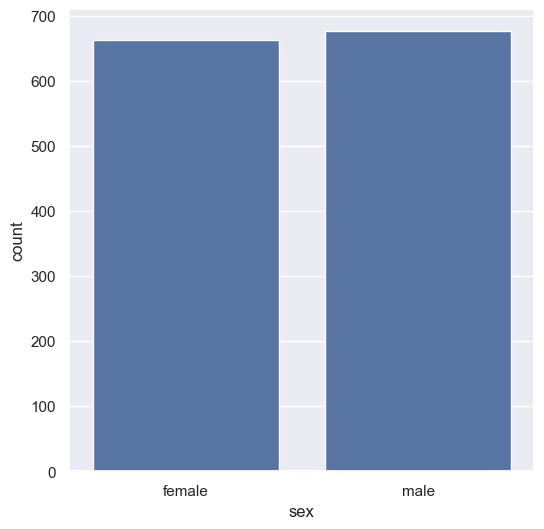

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex', data = data)

<Axes: xlabel='bmi', ylabel='Count'>

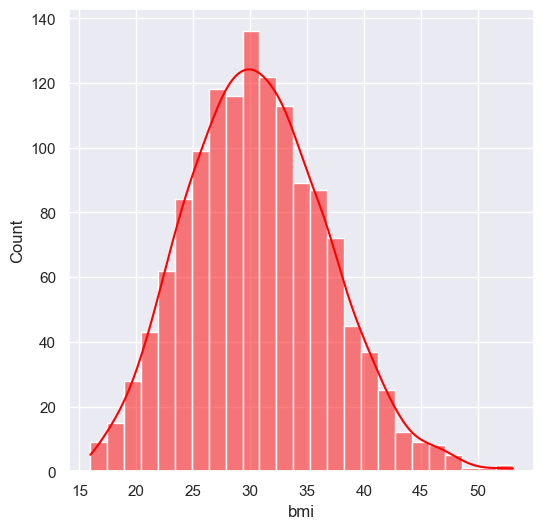

In [14]:
plt.figure(figsize=(6, 6))
sns.histplot(data['bmi'], kde=True, color='red')

<Axes: xlabel='children', ylabel='count'>

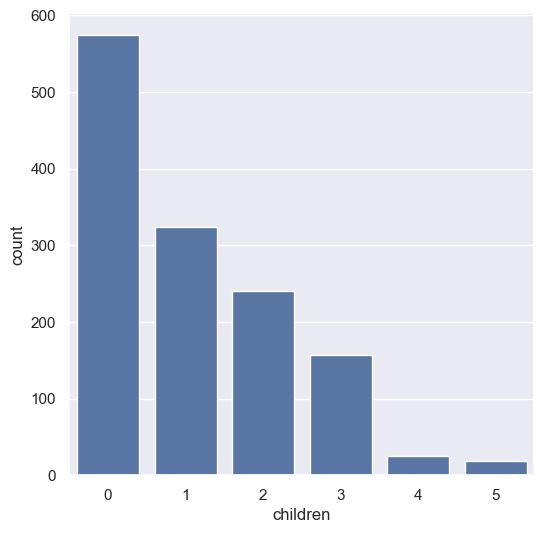

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'children', data = data)

In [16]:
data.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

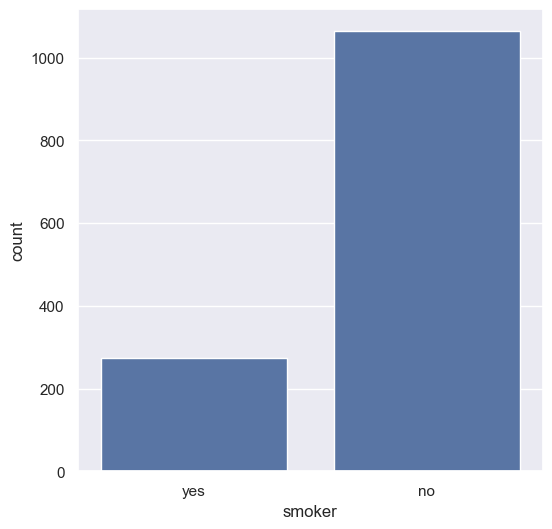

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'smoker', data = data)

In [18]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

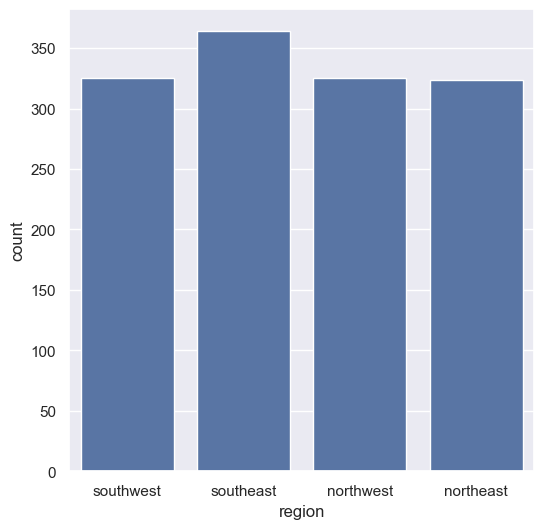

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'region', data = data)

<Axes: xlabel='charges', ylabel='Count'>

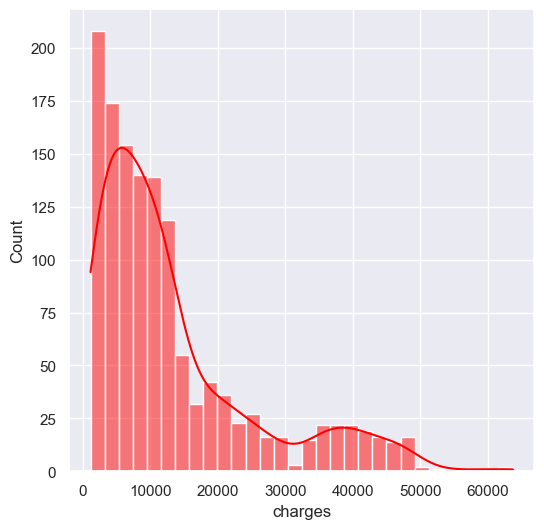

In [20]:
plt.figure(figsize=(6, 6))
sns.histplot(data['charges'], kde=True, color='red')

In [23]:
encoder = LabelEncoder()
data['region'] = encoder.fit_transform(data['region'])
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
X = data.drop(columns='charges', axis=1)
y = data['charges']

In [32]:
print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
training_prediction = model.predict(X_train)
training_r2_score = r2_score(y_train, training_prediction)
print('R2 score of training data:', training_r2_score)

R2 score of training data: 0.7519923667088932


In [ ]:
testing_prediction = model.predict(X_test)
testing_r2_score = r2_score(y_test, testing_prediction)
print('R2 score of testing data:', testing_r2_score)

R2 score of testing data: 0.7445422986536503


In [44]:
input_data = (31,0,25.74,0,0,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[3587.82055864]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
